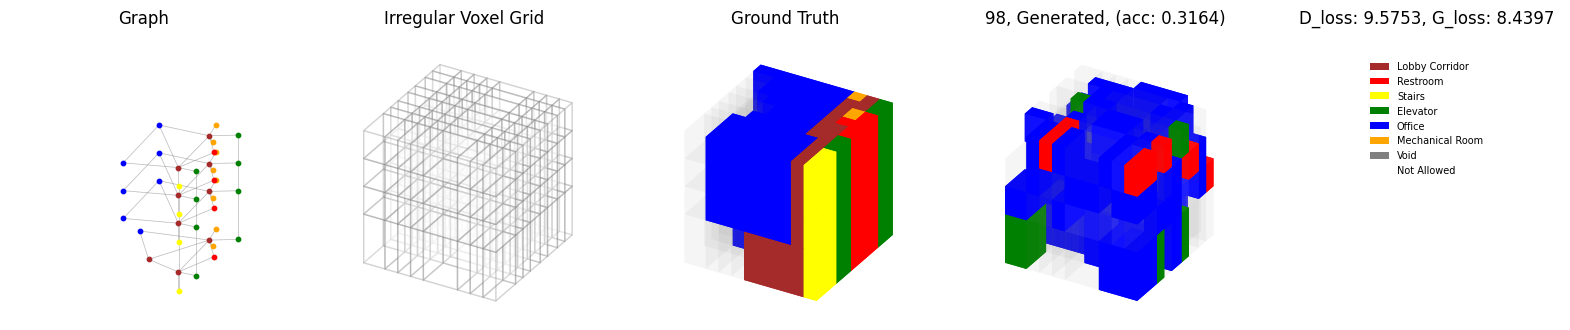


                    d_loss_real: 0.007586514111608267, 
                    d_loss_fake: 0.013625891879200935, 
                    d_loss: 9.575326919555664, 
                    g_loss: 8.439681053161621,
                    g_loss_adv: 5.552718162536621,
                    g_loss_label: 1.28173828125,
                    g_loss_ratio: 1.605224609375,
                    


In [ ]:
import os
import sys
import torch
import matplotlib.pyplot as plt

if os.path.abspath("../../") not in sys.path:
    sys.path.append(os.path.abspath("../../"))

from building_gan.src.config import Configuration
from building_gan.src.data import GraphDataLoaders
from building_gan.src.models import VoxelGNNGenerator, VoxelGNNDiscriminator
from building_gan.src.trainer import Trainer

configuration = Configuration()
configuration.set_seed()

dataloaders = GraphDataLoaders(configuration=configuration)
generator = VoxelGNNGenerator(configuration)
discriminator = VoxelGNNDiscriminator(configuration)

optimizer_generator = torch.optim.Adam(generator.parameters(), lr=configuration.LEARNING_RATE_GENERATOR)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=configuration.LEARNING_RATE_DISCRIMINATOR)

trainer = Trainer(
    generator=generator,
    discriminator=discriminator,
    dataloaders=dataloaders,
    optimizer_generator=optimizer_generator,
    optimizer_discriminator=optimizer_discriminator,
    configuration=configuration,
)

trainer.train()